In [1]:
import pandas as pd
df = pd.read_csv("heart_2020_cleaned.csv", nrows=50000)
df.info()
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'heart_2020_cleaned.csv'

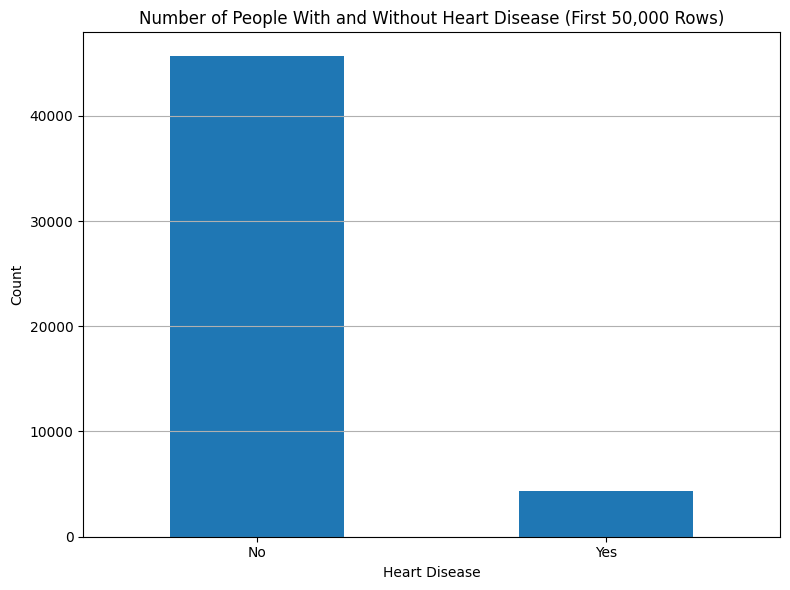

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotting the number of people with and without heart disease
plt.figure(figsize=(8, 6))
df['HeartDisease'].value_counts().plot(kind='bar')
plt.title('Number of People With and Without Heart Disease (First 50,000 Rows)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,50000.000000,50000.000000,50000.000000,50000.00000
mean,27.971388,3.539560,3.984260,7.12938
std,6.239799,8.094921,7.979439,1.49613
min,12.400000,0.000000,0.000000,1.00000
25%,23.710000,0.000000,0.000000,6.00000
50%,26.960000,0.000000,0.000000,7.00000
75%,31.010000,2.000000,4.000000,8.00000
max,87.050000,30.000000,30.000000,24.00000


In [ ]:
binary_cols = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Diabetic', 'PhysicalActivity',
    'Asthma', 'KidneyDisease', 'SkinCancer'
]

df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)



C:\Users\modyx\AppData\Local\Temp\ipykernel_21892\1360497000.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [ ]:
## Male is  1, Female is 0
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})


In [ ]:
df['ComorbidityCount'] = df[['Stroke', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']].sum(axis=1)

In [ ]:
df['UnhealthyDays'] = df['PhysicalHealth'] + df['MentalHealth']
df['UnhealthyDays'] = df['UnhealthyDays'].clip(upper=30)

In [ ]:
df['RiskBehavior'] = ((df['Smoking'] == 1) | (df['AlcoholDrinking'] == 1)).astype(int)

In [ ]:
df['SleepCategory'] = pd.cut(df['SleepTime'],
                             bins=[0, 5, 6.9, 8.9, 24],
                             labels=['Very Short', 'Short', 'Normal', 'Long'])


In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,ComorbidityCount,UnhealthyDays,RiskBehavior,SleepCategory
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,1,Very good,5.0,1,0,1,3,30.0,1,Very Short
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,1,Very good,7.0,0,0,0,1,0.0,0,Normal
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,1,Fair,8.0,1,0,0,2,30.0,1,Normal
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,0,Good,6.0,0,0,1,1,0.0,0,Short
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,1,Very good,8.0,0,0,0,0,28.0,0,Normal


In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'ComorbidityCount',
       'UnhealthyDays', 'RiskBehavior', 'SleepCategory'],
      dtype='object')

In [ ]:
df.to_csv("heart_cleaned_final.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split
import pickle


X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Save each set as a Pickle (.p) file
pickle.dump(X_train, open("X_train.p", "wb"))
pickle.dump(X_test, open("X_test.p", "wb"))
pickle.dump(y_train, open("y_train.p", "wb"))
pickle.dump(y_test, open("y_test.p", "wb"))

print("Pickle files saved successfully!")


Pickle files saved successfully!
